# Lending Club Case Study

<strong>Objectives</strong>

Using EDA, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

<strong>How Objectives will be utilized?</strong>

When the company receives a loan application, based on above indicators, the company wants to make a decision for loan approval based on the applicant’s profile. The decision should help in not losing the business to the company if the applicant is able to pay and at the same time, do not enter in to credit loss (financial loss) to the company if the applicant is not able to pay.

<br></br>
<strong>Assumptions</strong>

1. The company allows a loan to remain delinquent for a period of time before considering it as default.

<br></br>
<strong>Decisions</strong>

1. Considering assumption 1, we are not considering the column 'mths_since_last_delinq' as part of dataset since our goal is to identify factors which can help even prior approving the loan but not after the applicant has delinquent the loan which happens once the loan is approved.

<br></br>
<strong>Approach</strong>

1. As a first step, ensure the dataset is clean. As we are not sure which parameter or variable (column) would have impact on defaulting, the approach objective is to retain clean data including whatever possible columns. <br>Here, we perform Data Cleaning Steps by following the checklist: Fix rows and columns, Missing Values, Standardise Numbers, Standardise Text, Fix Invalid Values and Filter Data
2. Once the above master dataset is created, we try to make subsets appropriately to assess the impacts of variables.

<br></br>

### Common Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

### Common Functions

In [2]:
#Check and drop column within the data frame.

def dropColumn(dataframe, colName):
    ret = dataframe
    if colName in dataframe.columns:
        ret = dataframe.drop(colName, axis=1)

    return ret

### Data Imports

In [3]:
loans_orig = pd.read_csv("loan.csv")

#Copy the original data set
loans = loans_orig.copy()

print(loans.shape)

(39717, 111)


/home/nautiyogi/anaconda3/envs/my_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Cleaning

#### 1. Fix Rows and Columns

Handle Incorrect rows, Summary rows, Extra rows, Missing Column Names, Inconsistent column names, Unnecessary columns, Columns containing Multiple data values, No Unique Identifier, Misaligned columns

In [4]:
#Below are not issues

#Incorrect rows, Summary rows, Extra rows, Missing Column Names, Inconsistent column names

loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

##### Working on checklist item: Unnecessary columns

In [5]:
#Check the nulls across columns

round(100*(loans.isnull().sum()/len(loans.index)), 2)

# From below, we could see id, member_id, loan_amnt etc are not null. Many of the columns are having 100% nulls.

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [6]:
# Drop ALL COLUMNS where ALL values are Nulls.

loans = loans.dropna(axis=1, how='all')

print (loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(39717, 57)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [7]:
# Drop ALL COLUMNS where ALL values are Zeroes.

loans = loans.loc[:, loans.any()]

#Removes below columns

#collections_12_mths_ex_med
#acc_now_delinq
#chargeoff_within_12_mths
#delinq_amnt
#tax_liens

print(loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(39717, 52)


id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc  

In [8]:
# From above, we could see more nulls are in columns : next_pymnt_d, mths_since_last_record

# After checking metadata, these columns might not be required for assessments. Dropping off the columns.

loans = dropColumn(loans, 'next_pymnt_d')
loans = dropColumn(loans, 'mths_since_last_record')

round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec   

In [9]:
# From above, we could see more nulls are in column : mths_since_last_delinq

# After checking metadata, this column indicates 'The number of months since the borrower's last delinquency.'.

# Delinquency after certain period leads to defaulting. 
# It might be a important paramter to assess but by considering the decision # 1, proceeding to drop column due to
# below assessment.

# Prior removing the column, if we check loan status:

loans.loan_status.value_counts()

#Fully Paid     32950
#Charged Off     5627
#Current         1140

# If we try to remove the column, the loan status would become:

tmp = loans

tmp = tmp[~pd.isnull(tmp['mths_since_last_delinq'])]

loans.loan_status.value_counts()

#Fully Paid     11530
#Charged Off     2142
#Current          363

# Retaining the column will remove records of 'Charged Off' which is our target of assessment.
# Also, the Current records reduces by 70%, which might be useful to understand potential defaulters.

# Hence dropping the column

loans = dropColumn(loans, 'mths_since_last_delinq')

round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
pymnt_plan                  0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [10]:
# Dropping irrelevant columns considering the Objective, and reviewing the loan metadata

unwantedCols = ['id', 'member_id', 'url', 'desc', 'title', 'last_pymnt_d', 'pub_rec_bankruptcies']

loans = loans.drop(unwantedCols, axis=1)

print(loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(39717, 42)


loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
initial_list_status        0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_py

In [11]:
#Col: emp_title: The job title supplied by the Borrower when applying for the loan.*

loans.emp_title.value_counts()

#US Army                                            134
#U.S. Army                                           41
#US ARMY                                             39

#There are many variations in the employee title.
#Though it is very useful information in assessing which type of employees is more defaulting,
#but it is very cumbersome to get consistency in this column, considering multiple possible values. 
#Eg: above for US Army.

#Col: issue_d: The month which the loan was funded

loans.issue_d.value_counts()

#Dec-11    2260
#Nov-11    2223

#Col: pymnt_plan

loans.pymnt_plan.value_counts()

#n    39717

#No significance values exists for pymnt_plan

#Col: earliest_cr_line: The month the borrower's earliest reported credit line was opened. Not significant for assessments.

#Dataset is between 2007 to 2011. There is no objective in analyzing the trends of defaulting across years.

loans.earliest_cr_line.value_counts()

#Nov-98    370
#Oct-99    366

byStatus = loans.groupby('loan_status')

#Col: inq_last_6mths

byStatus.inq_last_6mths.value_counts()

#Not sure, if the inq_last_6mths is having significant impact on defaulters. Need to assess further on this variable.

#Col: open_acc: The number of open credit lines in the borrower's credit file.

byStatus.open_acc.value_counts()

#Col: pub_rec: Number of derogatory public records

byStatus.pub_rec.value_counts()

#Col: revol_bal: Total credit revolving balance
#https://www.creditcards.com/glossary/term-revolving-balance.php

byStatus.revol_bal.describe()

#Col: revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

byStatus.revol_util.describe()
byStatus.revol_util.value_counts()

#considering, revol_util column is available in percentage, it is safe to drop revol_bal. 

#Col: total_acc: The total number of credit lines currently in the borrower's credit file

byStatus.total_acc.describe()

#Col: initial_list_status

loans.initial_list_status.value_counts()

#f    39717

#Col: total_rec_late_fee

loans.total_rec_late_fee.describe()

#50%          0.000000

#Col: recoveries: post charge off gross recovery. Will not be helpful column.

loans.recoveries.describe()

#This is a post excersie after defaulting. Might not be helpful column.

#Col: collection_recovery_fee: post charge off collection fee

loans.collection_recovery_fee.describe()

#This is a post excersie after defaulting. Might not be helpful column.

#Col: last_pymnt_amnt: Last total payment amount received

loans.last_pymnt_amnt.describe()

#Not helpful column

#Col: last_credit_pull_d: The most recent month LC pulled credit for this loan

loans.last_credit_pull_d.describe()

#Not helpful column

#Col: policy_code

loans.policy_code.value_counts()

#1    39717

#Col: application_type

loans.application_type.value_counts()

#INDIVIDUAL    39717


unwantedCols = ['emp_title', 'issue_d', 'pymnt_plan', 'earliest_cr_line', 'revol_bal', 'initial_list_status', 
            'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
           'policy_code', 'application_type']

loans = loans.drop(unwantedCols, axis=1)

print(loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(39717, 29)


loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_prncp        0.00
total_rec_int          0.00
dtype: float64

##### Working on checklist item: Columns containing Multiple data values

In [12]:
#Verify categorical columns

#Col: term

loans.term.value_counts()

#36 months    29096
#60 months    10621

#Defining two columns to differentiate two terms

loans['term_36'] = loans.term.apply(lambda x: 1 if (x == ' 36 months') else 0)
loans['term_60'] = loans.term.apply(lambda x: 1 if (x == ' 60 months') else 0)

loans = loans.drop(['term'], axis=1)

loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,term_36,term_60
0,5000,5000,4975.0,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,1,0
1,2500,2500,2500.0,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0,1
2,2400,2400,2400.0,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,1,0
3,10000,10000,10000.0,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,1,0
4,3000,3000,3000.0,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0,1


In [13]:
#Col: emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

loans.emp_length.value_counts()

loans.emp_length = pd.to_numeric(loans['emp_length'].astype(str).str.rstrip('years').replace("10+ ", "10").replace("< 1 ", "0"), errors='coerce')

loans.emp_length.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

##### Working on checklist item: No Unique Identifier

In [14]:
#Cols: zip_code and addr_state

loans.zip_code.value_counts()

#Eg:
#100xx    597
#945xx    545

loans.addr_state.value_counts()

#state codes are uniquely available

#Eg:
#CA    7099
#NY    3812

# In order to check defaulters are more on a specific state and a location (though zipcode is partially available),
# better to retain the data. Also, combining both state and zip code to form a unique identifier - 'addr_state_zip'

loans['addr_state_zip'] = loans.addr_state + "_" + loans.zip_code

loans.addr_state_zip.value_counts()

#As we could see zip_code with 945xx is having 545 records, 
# now after combining, we could see 945xx with state CA is having 544 records.
# Definitely, addr_state_zip brings some uniqueness for locality.

#Dropping zip_code which is now not required

loans = loans.drop(['zip_code'], axis=1)

print(loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(39717, 30)


loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_prncp        0.00
total_rec_int          0.00
term_36                0.00
term_60                0.00
addr_state_zip         0.00
dtype: float64

#### Working on checklist item: Remove invalid rows

In [15]:
#Removing null rows which cannot be imputed

loans = loans[~pd.isnull(loans['emp_length'])]
loans = loans[~pd.isnull(loans['revol_util'])]

print(loans.shape)

round(100*(loans.isnull().sum()/len(loans.index)), 2)

(38595, 30)


loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
dti                    0.0
delinq_2yrs            0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
out_prncp              0.0
out_prncp_inv          0.0
total_pymnt            0.0
total_pymnt_inv        0.0
total_rec_prncp        0.0
total_rec_int          0.0
term_36                0.0
term_60                0.0
addr_state_zip         0.0
dtype: float64

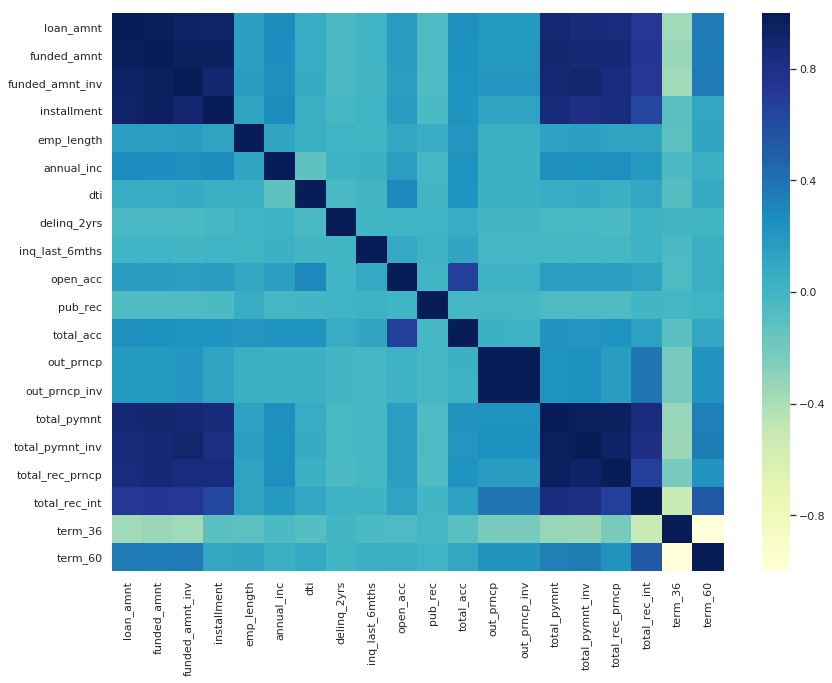

In [18]:
#Correlation heatmap
sns.set(rc={'figure.figsize':(13.7,10.27)})
sns.heatmap(loans.corr(), vmax=1., square=False , cmap="YlGnBu")
plt.show()

In [24]:
sns.pairplot(loans)
plt.show()

KeyboardInterrupt: 

In [30]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'term_36', 'term_60', 'addr_state_zip'],
      dtype='object')

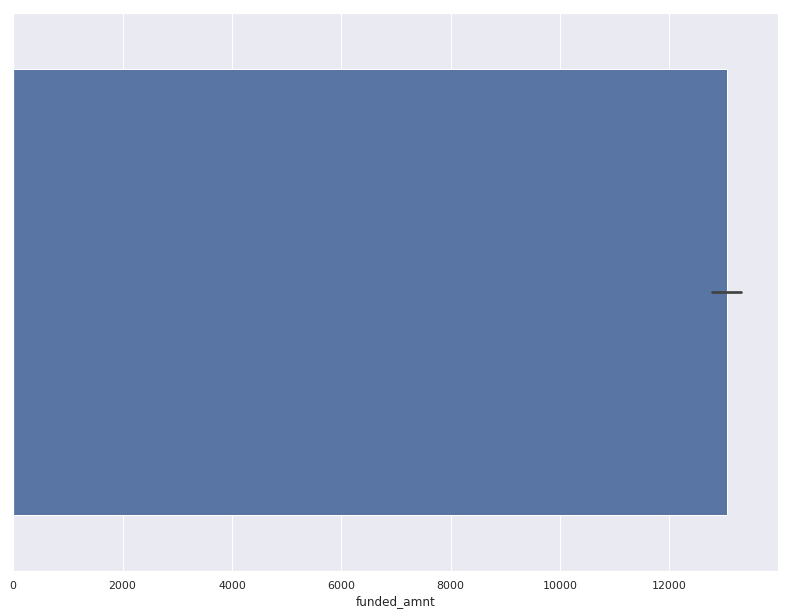

In [42]:
#loans[['funded_amnt_inv','loan_amnt','funded_amnt']]
sub = loans[loans['loan_amnt'] != loans['funded_amnt']][['funded_amnt','loan_status']]
ax = sns.barplot(x=sub.funded_amnt,  data=sub)
